In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns

### Dataset

In [2]:
# Dataset
df = pd.read_csv('instagram_reach.csv')
# Head
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
# Tail
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [4]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


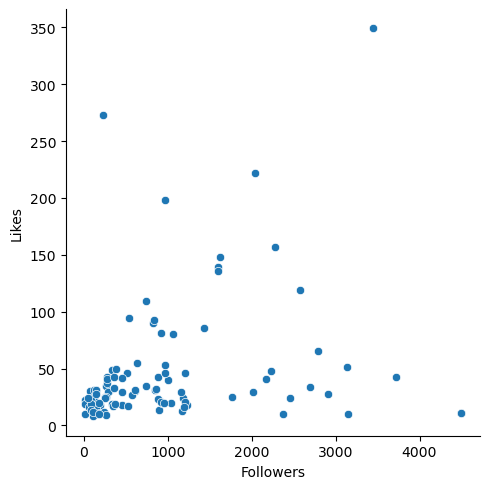

In [5]:
sns.relplot(x='Followers',y='Likes', data=df)

### Data Cleaning

In [6]:
# Drop unncessary columns
df.drop(['Unnamed: 0','S.No'],axis=1, inplace=True)

In [7]:
df.shape # Check shape

(100, 6)

In [8]:
# Turn '11 hours' -> '11' and convert it into integer datatype
df['Time since posted'] = df['Time since posted'].str.replace(' hours',' ').astype('int')

In [9]:
# Fill missing values 'No caption'
df['Caption'].fillna('No Caption',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            100 non-null    object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int64 
 5   Likes              100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [11]:
cleaned_df = df.copy()

In [12]:
cleaned_df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [19]:
# Labelencoding
label_encoder = LabelEncoder()
username_encoding = label_encoder.fit_transform(cleaned_df['USERNAME'])
caption_encoding = label_encoder.fit_transform(cleaned_df['Caption'])
hashtags_encoding = label_encoder.fit_transform(cleaned_df['Hashtags'])

In [22]:
# Drop 'categorical' features
cleaned_df.drop(['USERNAME','Caption','Hashtags'],axis=1,inplace=True)

In [24]:
# Convert categorical to numerical and add columns to dataframe
cleaned_df['Username'] = username_encoding
cleaned_df['Captions'] = caption_encoding
cleaned_df['Hashtags'] = hashtags_encoding

In [27]:
cleaned_df.columns

Index(['Followers', 'Time since posted', 'Likes', 'Username', 'Captions',
       'Hashtags'],
      dtype='object')

In [28]:
# Independent and Dependent features
X = cleaned_df[['Followers','Username','Captions','Hashtags']]
y = cleaned_df[['Time since posted','Likes']]

In [41]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2 = r2_score(true,predicted)
    return mae,mse,r2


In [49]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_mae, model_train_mse, model_train_r2=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_mae, model_test_mse, model_test_r2 =evaluate_clf(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print('- MAE : {:.4f}'.format(model_train_mae)) 
        print('- MSE: {:.4f}'.format(model_train_mse))
        print('- r2: {:.4f}'.format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MAE : {:.4f}'.format(model_test_mae)) 
        print('- MSE: {:.4f}'.format(model_test_mse))
        print('- r2: {:.4f}'.format(model_test_r2))
        print('='*35)
        print('\n')
        


In [39]:
models = {
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "KNN": KNeighborsRegressor(),
        "Linear":LinearRegression()
}

In [50]:
results = evaluate_models(X,y,models)

DecisionTreeRegressor
Model performance for Training set
- MAE : 0.0000
- MSE: 0.0000
- r2: 1.0000
----------------------------------
Model performance for Test set
- MAE : 20.2500
- MSE: 1513.9000
- r2: -1.8603


KNN
Model performance for Training set
- MAE : 16.2437
- MSE: 1376.8273
- r2: 0.1864
----------------------------------
Model performance for Test set
- MAE : 11.4150
- MSE: 519.4030
- r2: 0.3104


Linear
Model performance for Training set
- MAE : 18.0378
- MSE: 1411.2962
- r2: 0.1302
----------------------------------
Model performance for Test set
- MAE : 14.8221
- MSE: 776.4862
- r2: -0.0562




In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
model = LinearRegression()
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train,y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [64]:
X_train

,Followers,Username,Captions,Hashtags
55,3448,13,82,28
88,1158,20,58,56
26,265,22,2,20
42,273,42,72,25
69,1003,40,50,55
...,...,...,...,...
60,145,81,81,13
71,383,61,26,37
14,2904,9,27,34
92,106,21,68,42


In [68]:
y_pred = wrapper.predict(X_test)
y_pred

array([[ 2.27502122, 30.61570906],
       [ 2.63249847, 19.70278355],
       [ 3.05158567, 56.18172341],
       [ 2.44079336, 31.69494411],
       [ 1.98945059, 13.27590325],
       [ 2.79613888, 17.94678257],
       [ 3.99791042, 72.60730091],
       [ 3.33153169, 70.89902857],
       [ 3.27546371, 44.75331144],
       [ 4.36937443, 65.85801367],
       [ 3.2969656 , 50.75729602],
       [ 3.59666887, 64.35986838],
       [ 4.56704049, 59.72555826],
       [ 3.02969659, 36.5049351 ],
       [ 2.0963529 , 18.11205995],
       [ 2.59895588, 33.91759918],
       [ 2.69342575, 32.35126566],
       [ 2.55629479, 32.02739136],
       [ 3.13925265, 61.30848944],
       [ 1.7746409 , 11.74717305]])